# Netflix Data Analysis

Bienvenue dans cette analyse des données Netflix.  
Ce projet a pour but d'explorer un dataset regroupant les films et séries disponibles sur la plateforme en septembre 2021.  
Nous allons nettoyer, explorer et visualiser ces données à l’aide des bibliothèques Python les plus utilisées en data science : **Pandas**, **Matplotlib**, **Seaborn**, **Missingno**, etc.

---

## Sommaire

1. Chargement et aperçu du dataset  
2. Nettoyage des données  
3. Exploration univariée et bivariée  
4. Visualisations  
5. Conclusion

---


## 1. Chargement du dataset

Nous allons maintenant charger le dataset Netflix dans un DataFrame Pandas.


In [46]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Chargement des données
df = pd.read_csv("netflix_titles.csv")


### 2. Aperçu du dataset

On affiche les 5 premières et 5 dernières lignes pour mieux comprendre la structure.


In [77]:
df.head()  # 5 premières



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


In [78]:
df.tail()  # 5 dernières


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111.0


### 3. Informations générales sur le dataset


In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration_minutes  6128 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB

### 4. Dimensions du dataset
Nombre de lignes (observations) et de colonnes (variables).


In [105]:
df.shape


(8807, 13)

### 5. Liste des colonnes


In [117]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_minutes'],
      dtype='object')

### 6. Types des données et catégorisation


In [128]:
df.dtypes


show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
duration_minutes           float64
dtype: object

### 7. Données manquantes (%)


In [139]:
# Pourcentage de valeurs manquantes par colonne
df.isnull().mean() * 100


show_id              0.000000
type                 0.000000
title                0.000000
director            29.908028
cast                 9.367549
country              9.435676
date_added           1.112751
release_year         0.000000
rating               0.045418
duration             0.034064
listed_in            0.000000
description          0.000000
duration_minutes    30.418985
dtype: float64

### 8. Visualisation des données manquantes


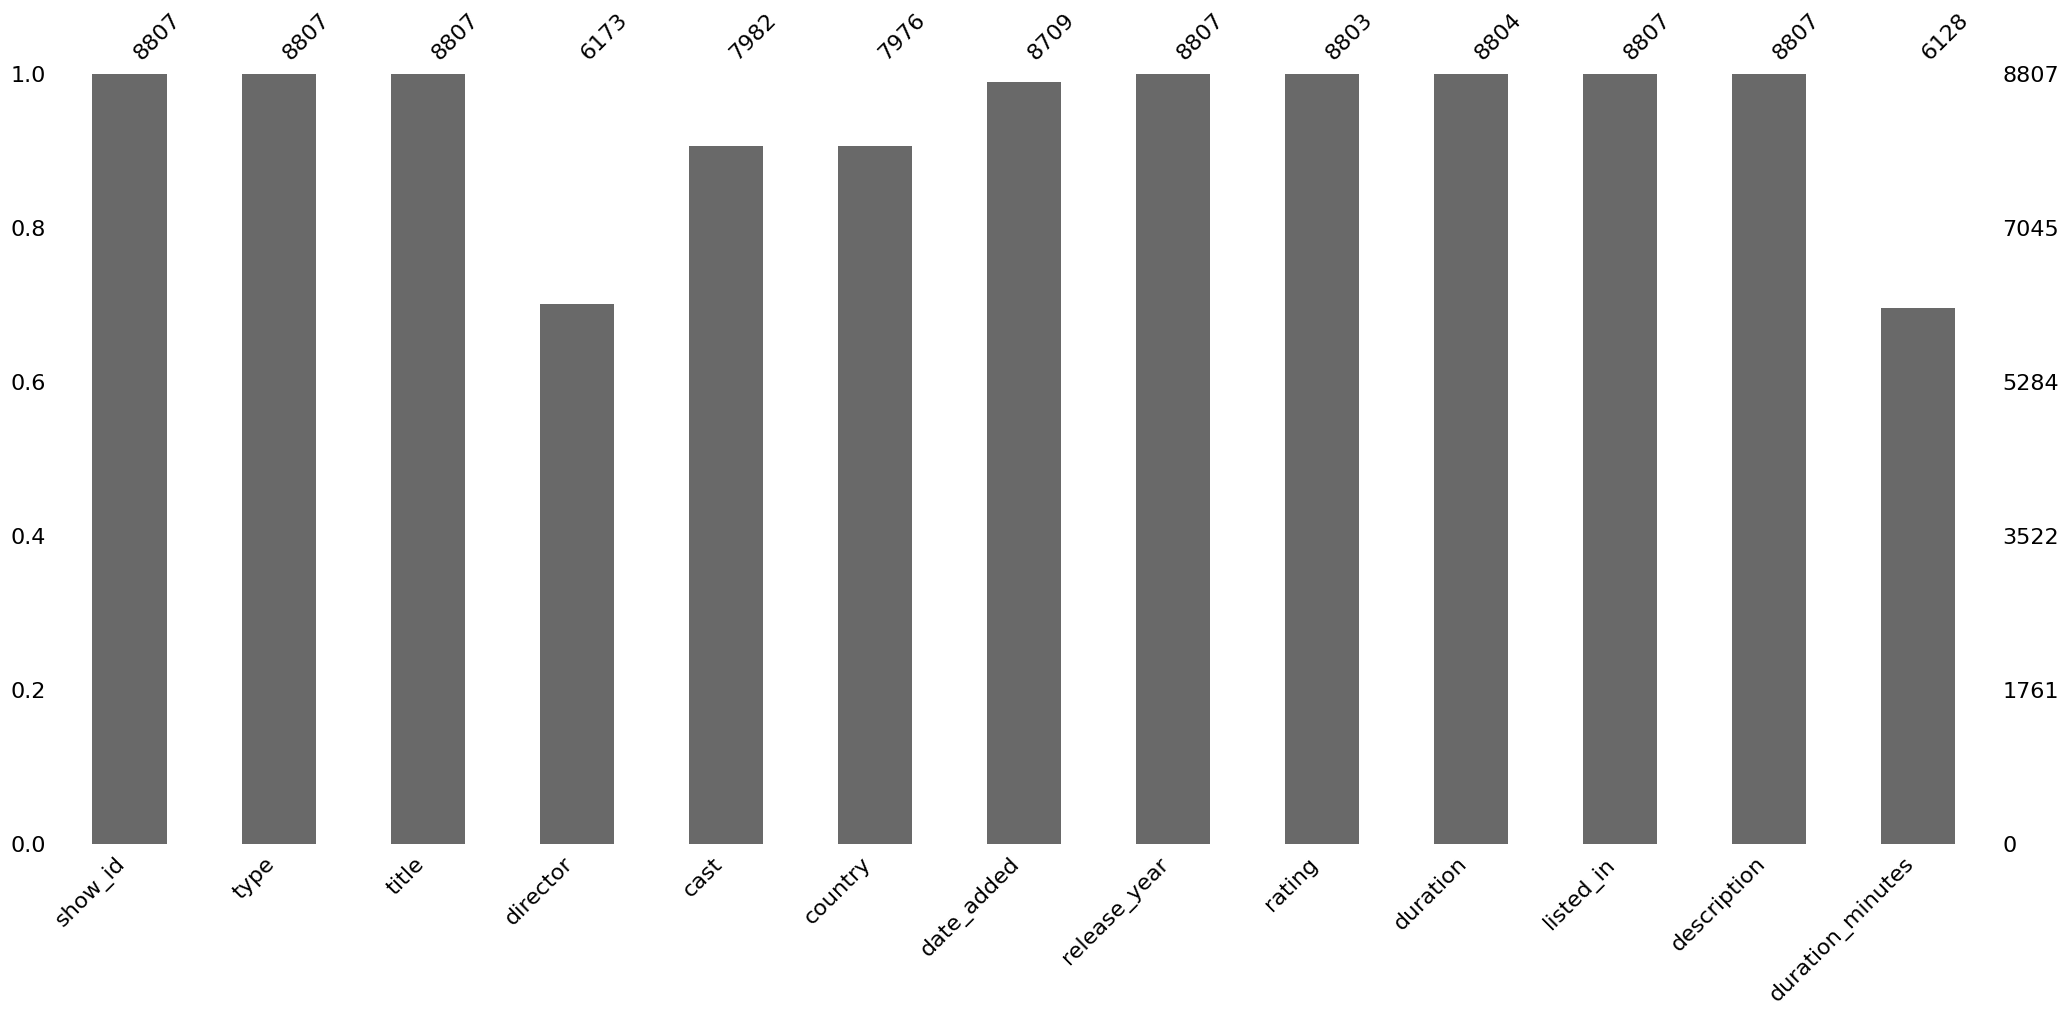

In [158]:
msno.bar(df)
plt.show()


### 9. Observation aléatoire


In [167]:
df.sample(1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
549,s550,TV Show,Big Timber,NaN,NaN,NaN,2021-07-02,2020,TV-14,1 Season,"International TV Shows, Reality TV",A no-nonsense logger and his loyal crew battle...,NaN


### 10. Informations sur l'œuvre “Catch Me If You Can”


In [175]:
df[df['title'] == "Catch Me If You Can"]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2021-08-01,2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,142.0


### 11. Film le plus récent du dataset


In [188]:
films = df[df['type'] == 'Movie']
films.sort_values(by='release_year', ascending=False)[['title', 'release_year']].head(1)


,title,release_year
93,JJ+E,2021


### 12. Série la plus récente du dataset


In [194]:
series = df[df['type'] == 'TV Show']
series.sort_values(by='release_year', ascending=False)[['title', 'release_year']].head(1)


,title,release_year
225,Open Your Eyes,2021


### 13. Conversion de date_added en DateTime


In [203]:
df['date_added'] = pd.to_datetime(df['date_added'])


### 14. Durée des films (en minutes)


In [246]:
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)


### 15. Durée des séries (en saisons)


In [247]:
df['duration_seasons'] = df['duration'].apply(lambda x: float(x.split()[0]) if 'Season' in str(x) else np.nan)


### 16. Transformation de listed_in en liste


In [248]:
df['listed_in_list'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in str(x).split(',')])


### 17. Valeurs uniques


In [249]:
df['type'].unique(), df['country'].unique(), df['release_year'].unique(), df['rating'].unique(), df['listed_in'].unique()


(array(['Movie', 'TV Show'], dtype=object),
 array(['United States', 'South Africa', nan, 'India',
        'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
        'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
        'Australia', 'United States, India, France', 'Finland',
        'China, Canada, United States',
        'South Africa, United States, Japan', 'Nigeria', 'Japan',
        'Spain, United States', 'France', 'Belgium',
        'United Kingdom, United States', 'United States, United Kingdom',
        'France, United States', 'South Korea', 'Spain',
        'United States, Singapore', 'United Kingdom, Australia, France',
        'United Kingdom, Australia, France, United States',
        'United States, Canada', 'Germany, United States',
        'South Africa, United States', 'United States, Mexico',
        'United States, Italy, France, Japan',
        'United States, Italy, Romania, United Kingdom',
        'Australia, United States

### 18. Réalisateurs ayant produit plusieurs œuvres


In [250]:
df['director'].value_counts().head(10)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

### 19. Année avec le plus de films


In [251]:
films['release_year'].value_counts().idxmax()


np.int64(2017)

### 20. Réalisateurs ayant produit plusieurs œuvres

Nous cherchons à savoir quels réalisateurs apparaissent plusieurs fois dans le dataset.


In [264]:
# Comptage des œuvres par réalisateur (hors valeurs manquantes)
directors_counts = df['director'].value_counts()

# Réalisateurs ayant produit plus d'une œuvre
directors_counts[directors_counts > 1].head(10)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

🧠 Analyse : Oui, plusieurs réalisateurs ont produit plusieurs œuvres, dont certains plus de 10 fois.


### 21. Année avec le plus de séries


In [265]:
series['release_year'].value_counts().idxmax()


np.int64(2020)

## 22 Visualisations des données Netflix


### a. Répartition des types d'œuvres

Ce graphique montre la répartition entre films et séries sur Netflix.


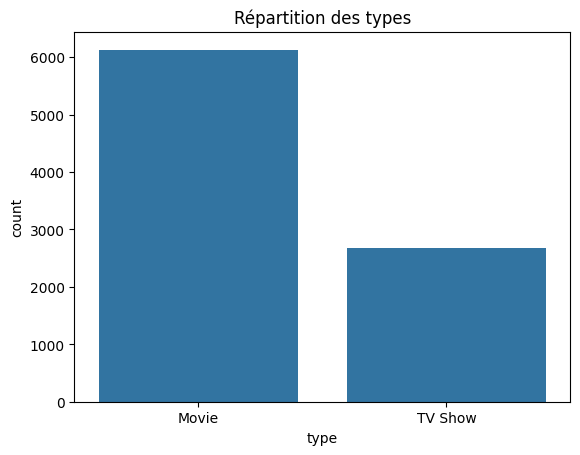

In [266]:
sns.countplot(data=df, x='type')
plt.title('Répartition des types')
plt.show()


### b. Répartition des œuvres par pays (Top 10)

On affiche les pays qui ont le plus de contenus sur la plateforme.


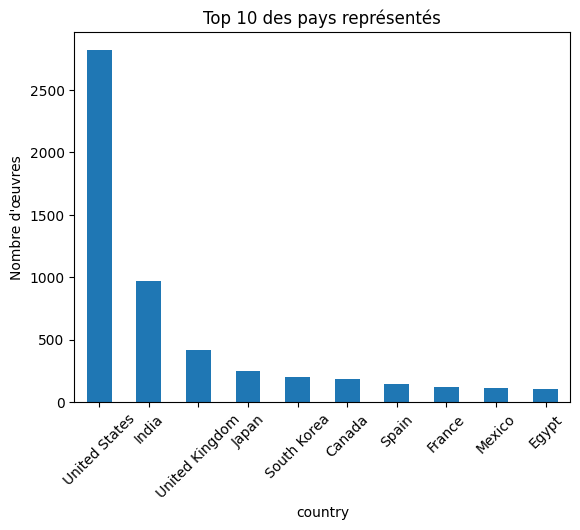

In [267]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des pays représentés')
plt.ylabel('Nombre d\'œuvres')
plt.xticks(rotation=45)
plt.show()


### c. Répartition des œuvres par année de sortie

Ce graphique montre l’évolution du nombre de contenus au fil des années.


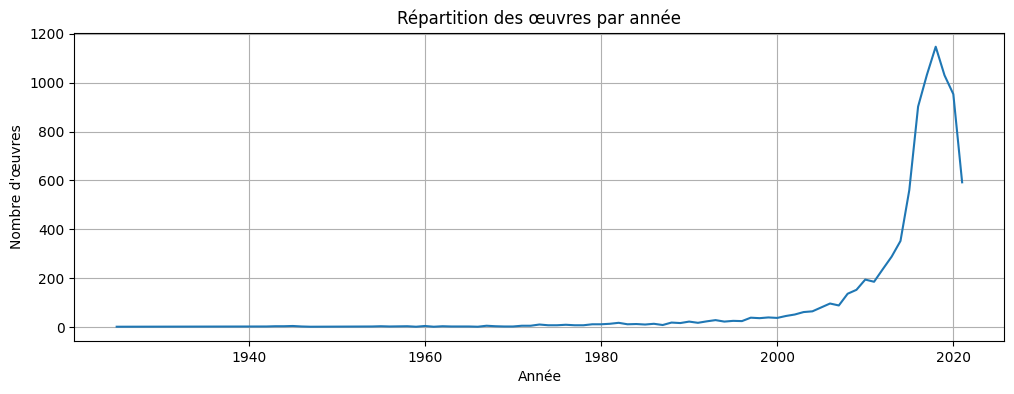

In [268]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12, 4))
plt.title('Répartition des œuvres par année')
plt.xlabel("Année")
plt.ylabel("Nombre d'œuvres")
plt.grid(True)
plt.show()


### d. Répartition des classifications (ratings)

Affiche les types de classifications des œuvres (ex : PG-13, TV-MA…).


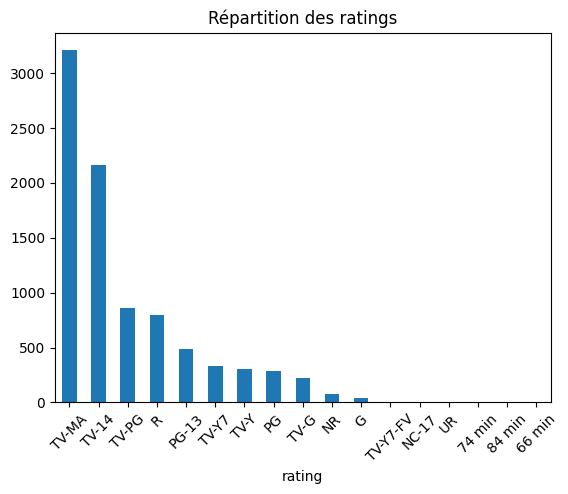

In [269]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Répartition des ratings')
plt.xticks(rotation=45)
plt.show()


### e. Répartition de la durée des films

Analyse de la durée des films en minutes.


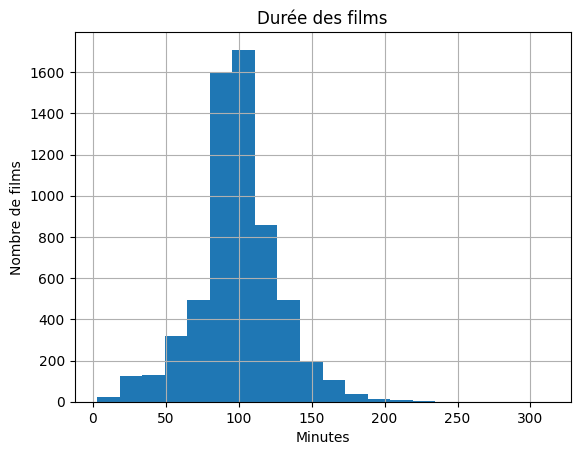

In [270]:
films = df[df['type'] == 'Movie']
films['duration_minutes'].dropna().hist(bins=20)
plt.title("Durée des films")
plt.xlabel("Minutes")
plt.ylabel("Nombre de films")
plt.show()


### f. Répartition du nombre de saisons des séries

On affiche combien de saisons ont les séries présentes sur Netflix.


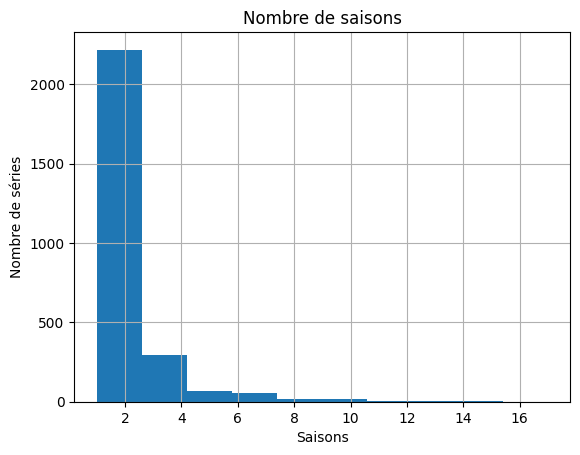

In [271]:
series = df[df['type'] == 'TV Show']
series['duration_seasons'].dropna().hist(bins=10)
plt.title("Nombre de saisons")
plt.xlabel("Saisons")
plt.ylabel("Nombre de séries")
plt.show()


### g. Répartition des genres (Top 10)

Ce graphique montre les genres les plus populaires.


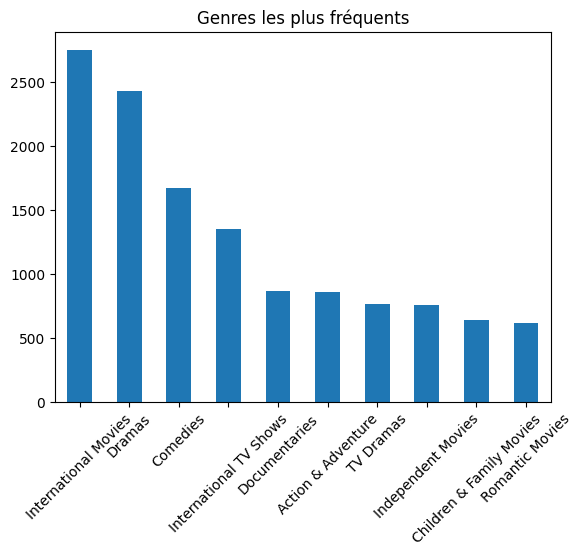

In [272]:
from collections import Counter
all_genres = sum(df['listed_in_list'], [])
pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Genres les plus fréquents")
plt.xticks(rotation=45)
plt.show()


### h. Top 5 des séries les plus longues

Séries avec le plus grand nombre de saisons.


In [273]:
series[['title', 'duration_seasons']].sort_values(by='duration_seasons', ascending=False).head(5)


,title,duration_seasons
548,Grey's Anatomy,17.0
4798,NCIS,15.0
2423,Supernatural,15.0
1354,Heartland,13.0
4220,COMEDIANS of the world,13.0


### i. Top 5 des films les plus longs

Affiche les films avec la durée la plus importante.


In [274]:
films[['title', 'duration_minutes']].sort_values(by='duration_minutes', ascending=False).head(5)


,title,duration_minutes
4253,Black Mirror: Bandersnatch,312.0
717,Headspace: Unwind Your Mind,273.0
2491,The School of Mischief,253.0
2487,No Longer kids,237.0
2484,Lock Your Girls In,233.0


### j. Réalisateurs les plus actifs pour les œuvres françaises

On affiche les réalisateurs qui apparaissent le plus souvent dans les œuvres produites en France.


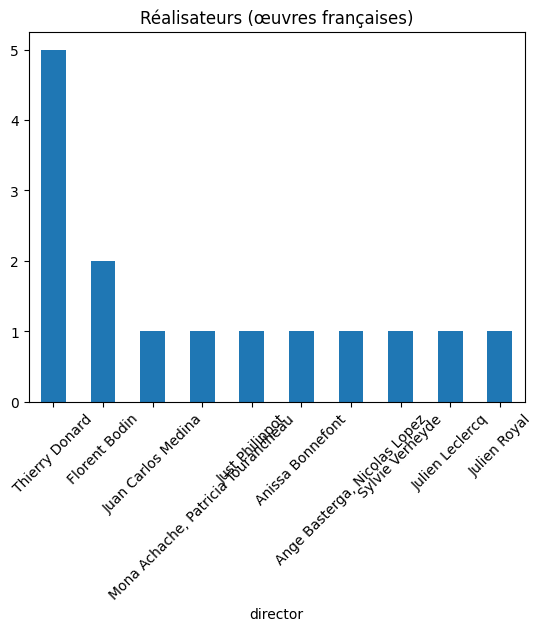

In [275]:
fr_df = df[df['country'] == 'France']
fr_df['director'].value_counts().head(10).plot(kind='bar')
plt.title("Réalisateurs (œuvres françaises)")
plt.xticks(rotation=45)
plt.show()


### k. Répartition des œuvres ajoutées par année

Quand les œuvres ont-elles été ajoutées sur Netflix ?


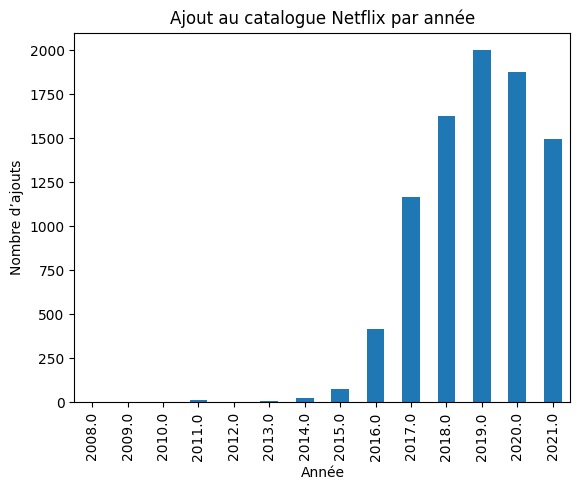

In [276]:
df['date_added'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Ajout au catalogue Netflix par année")
plt.xlabel("Année")
plt.ylabel("Nombre d’ajouts")
plt.show()


# Conclusion

Grâce à cette analyse, nous avons :

- nettoyé et transformé les données Netflix,
- identifié les œuvres les plus récentes, les pays les plus représentés et les types de contenus,
- visualisé les ratings, durées, genres, réalisateurs les plus actifs, etc.

Cette démarche de data analyst nous permet de mieux comprendre les tendances de consommation sur Netflix en 2021.  
La prochaine étape serait d'intégrer des modèles prédictifs ou de recommander des contenus en fonction des préférences utilisateurs.

Merci pour votre attention 👋  
